 # <center>Final Exam &ndash; DATA 3401 (Spring 2023)</center>

## Start Date: 5/5
## Due Date: 5/8 (at 11:59pm) &ndash; this is a hard deadline so don't miss it!

## Final Rules
This final exam is simliar to the midterm exam. Please work the exercises below **on your own**.  When you have completed the exam, you should push your completed jupyter notebook to your GitHub repo for this class in the **Exams->Final** folder.

You may not discuss the problems with **anyone else**, including persons on an online internet forum. Consulting an outside source like this will be considered an academic integrity violation. **Any questions should be referred to me.**

You may use all class resources including previous labs and lectures, and anything posted on the course website or Teams.

You may not use any function that trivializes a problem. For example, if I ask you to write a `max` function that computes the maximum entry in a list, you are not allowed to use the pre-defined Python function `max`; you must write your own.



## Exercise 1 (25 points)
In this exercise you will be working with the files abalone.names and abalone.data in the Final Exam folder.

1. Open the abalone.names file in your notebook. Using the information there, in a new cell briefly describe the data set and relevant features.
1. Load the abalone.data file into a dataframe using pandas. Print the .head() of the dataframe
1. Using the .names file, **add** a header line to your dataframe describing each column of data
1. Take the last column and make a new dataframe called `labels`
    1. Print out the value counts of each label.
    1. What do you notice about the distribution of the labels?
    1. Based on your observations, propose a way to modify the labels to consolidate some of the classes, and do this modification (you should describe in comments in your code what change you are making)
    1. After making your modification, show the value counts of the new labels again
1. Make a scatterplot of each feature against the others (it should be a single plot)
    1. Describe any trends or correlations that you see.


The file Abalone.names conatines informations about the abalone snails. The relevant information are pysical measurements of abalone along with their age. the datasets has 4177 instances and 9 features. these features incude sex (female or male), length (longest sheel measurement in millimeters), diameter, height, whole weight ( weight of the whole abalome in grams), shucked weight (weight of the meat in grams), viscera weight (weight of the gut after bleeding in grams), shell weight (weight of shell after being dreid in grams), and rings.  

In [4]:
import pandas as pd

df = pd.read_csv('abalone.data', header=None)
print(df.head())



   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


In [5]:
header_names = ['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
                'viscera_weight', 'shell_weight', 'rings']
df.columns = header_names
print(df.head())


  sex  length  diameter  height  whole_weight  shucked_weight  viscera_weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   shell_weight  rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7  


In [14]:
# Create a new dataframe for the labels column
labels = df.iloc[:, -1]

# Print the value counts of each label
print(labels.value_counts())


old            1447
young          1407
middle-aged    1323
Name: age_class, dtype: int64


4b. I noticed that age may be an important factor in prediciting other characteristics of abalones, such as size or weight.

In [18]:
df['age_class'] = pd.cut(df['rings'], bins=[0, 8, 10, 30], labels=['young', 'middle-aged', 'old'])
labels = df['age_class']
print(labels.value_counts())


old            1447
young          1407
middle-aged    1323
Name: age_class, dtype: int64


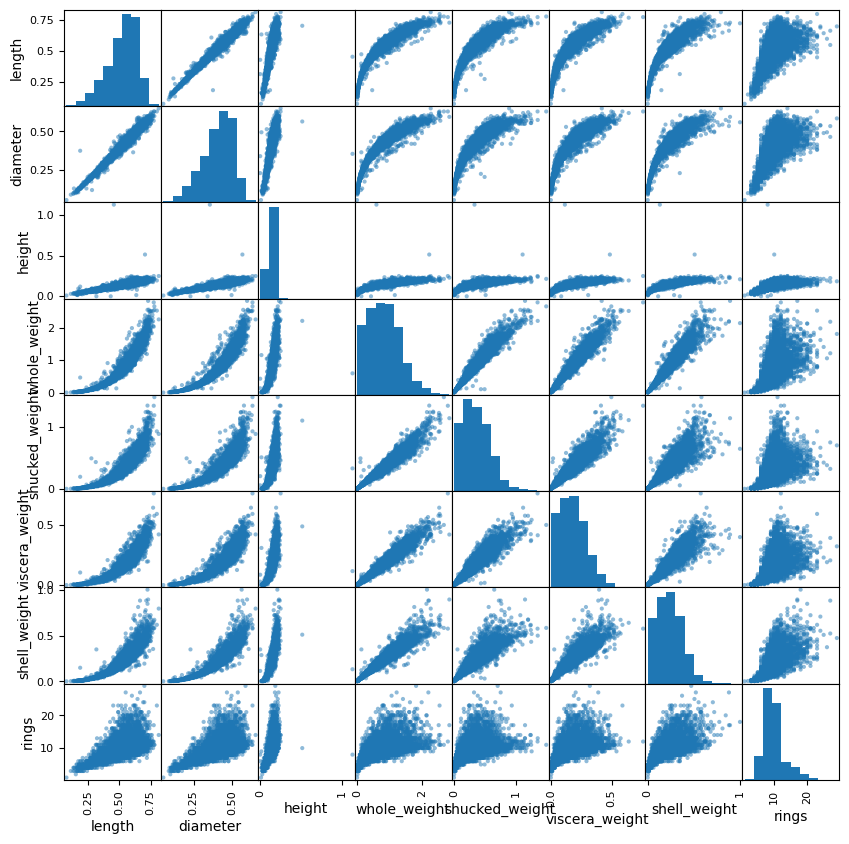

In [21]:
import matplotlib.pyplot as plt

# Create scatterplot matrix
pd.plotting.scatter_matrix(df, figsize=(10, 10))
plt.show()


## Exercise 2: (20 points)


Consider that a person is standing on the real line at a given point $x_0$. The person then goes on a "random walk", meaning that they first take a step of size 1 in a random direction (so after this step they are either standing at $x_0+1$ or $x_0-1$), then they take another step of size 1 in a random direction (after the second step they are standing at one of $x_0-2,  x_0, $ or  $x_0+2$), and they continue this process for $n$ steps. At each stage, the person flips a fair coin to decide which direction to go in.
1. Write a function `RandomWalk(num_steps,start_position)`, that takes the number of steps `num_steps` for a random walk and the `start_position` of the random walk on the real line (so a float), and returns the location of the final step of the random walker.
2. Write another function `SimulateRandomWalk(num_sims,num_steps,start_position)` that simulates num_sims number of random walks, each of which contains `num_steps` steps and starts at `start_position`. Then, this function calls `RandomWalk()` repeatedly for `num_sims` times and finally returns a vector of size `num_sim` containing the final locations of all of the `num_sims` simulated random-walks.
3. Now write a script that plots the output of `SimulateRandomWalk(num_sims = 10000, num_steps = 100, start_position = 0)` in a histogram
4. Repeat step 3 for `num_steps` = 1000, 5000


In [2]:
import random

def RandomWalk(num_steps, start_position):
    position = start_position
    for i in range(num_steps):
        step = random.choice([-1, 1])
        position += step
    return position

def SimulateRandomWalk(num_sims, num_steps, start_position):
    final_positions = []
    for i in range(num_sims):
        final_positions.append(RandomWalk(num_steps, start_position))
    return final_positions


In [24]:
print(RandomWalk(20,0))

2


In [25]:
print(SimulateRandomWalk(10000,100,0))

[-8, -14, 8, 2, 2, 2, 6, 4, -6, -10, -4, -4, 14, 0, 2, -2, 12, -8, 0, 0, -14, -6, -8, -14, -8, -4, 10, 0, -6, 0, 4, 10, 14, -6, -12, 14, 2, 2, -10, -6, 0, 18, 6, 4, 8, 10, -18, -6, -10, -4, -2, 2, -18, -2, 10, 4, 8, 0, 2, 0, -10, 6, -12, 4, -18, -18, 8, -10, -8, -14, 0, -4, 0, 6, -10, -14, -14, -10, 6, -2, -6, 10, 6, -10, 16, 8, -4, 0, 14, 0, -4, 6, 8, -2, -14, 16, -4, -2, -14, -4, 2, 22, 0, -12, -8, -18, -16, 4, 22, 6, -4, 10, 2, -6, -18, -6, 10, 6, 8, -6, 12, 2, 0, 12, -2, 16, 4, -6, 10, 2, -2, 22, -18, 8, 2, 4, 8, 6, -4, 10, 2, -2, 12, 12, -6, 2, 12, 2, -22, -6, -6, -6, -10, 0, -22, -2, 22, 8, -18, 4, -4, 2, -20, -12, -12, 2, -4, 8, -12, -2, 6, 8, 6, -4, 14, 6, 20, -16, 0, 10, -12, 2, 26, 6, -2, 2, 8, -22, 14, -16, -4, -6, 0, 10, -2, 2, -16, 0, 10, -10, -4, 0, 4, 0, 14, -4, -8, -8, 2, 10, 0, 8, -12, 16, -12, -4, 0, 0, -8, 0, -4, 0, 8, -6, 2, 14, -8, -6, -18, -8, -6, 8, -6, -16, -4, 6, 6, -4, 0, -2, -18, -4, -6, -2, -6, -10, 14, -2, -20, 8, -4, 12, -8, 12, 2, 10, -8, -20, 0, 0, 8, -1

In [26]:
print(SimulateRandomWalk(10000,1000,0))

[-8, -4, -48, -2, -30, 16, -74, -38, -16, -16, 0, -22, -60, 34, -46, -2, -90, 26, -48, -8, 10, -10, -4, -4, -4, -18, 8, -6, 12, -10, 42, 16, -4, -12, -20, 12, -52, -22, -26, 6, -22, -20, 28, 46, -22, 6, -28, 14, 22, -32, 30, 24, 12, 20, -24, -4, -104, 34, -20, -18, -14, -26, 6, -58, 30, 20, 32, -22, 68, -68, -24, -16, -12, -4, -4, -10, -4, -34, 42, -38, 50, 10, -34, -38, 16, 16, 4, -8, 24, -28, -10, 8, -40, -8, 34, -10, 28, 14, 28, 30, -92, -4, 2, 26, -36, 0, 44, -24, 28, 18, -50, -22, -2, -6, 12, -30, 10, 36, -18, 30, 26, 24, 32, -30, -28, 24, 4, -30, 24, -36, -96, 26, -8, 34, -36, 22, -20, 14, -22, -54, 16, -16, -6, -12, -66, 16, 6, 20, -18, -42, -50, -92, 10, 76, -28, -4, 12, -44, 70, 24, -42, -10, -28, -36, -14, -40, -20, -44, -22, -16, -2, -18, -36, -28, -18, -2, 2, 4, -38, 56, -8, -20, 16, 42, -28, -18, 4, 26, -58, -26, -10, -8, -56, 16, -20, 18, -30, 10, -30, -48, 20, 0, 78, -44, 80, 6, -16, 10, 2, -28, 2, -18, 16, -30, -38, 42, -12, -8, 20, -16, 12, -20, 10, 34, 38, -20, 4, -42

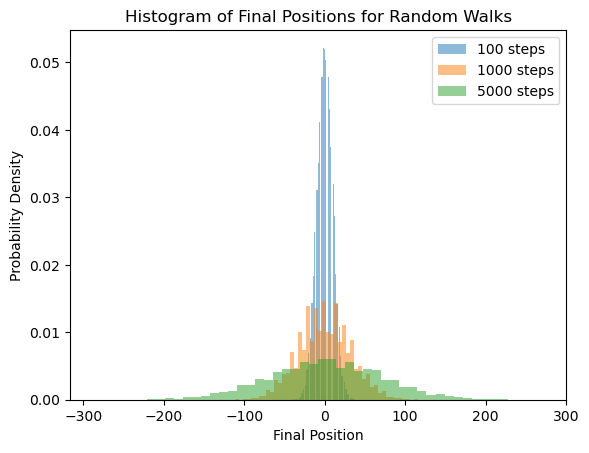

In [3]:
import matplotlib.pyplot as plt

num_sims = 10000
num_steps = [100, 1000, 5000]
start_position = 0

for steps in num_steps:
    final_positions = SimulateRandomWalk(num_sims, steps, start_position)
    plt.hist(final_positions, bins=50, density=True, alpha=0.5, label=f'{steps} steps')

plt.xlabel('Final Position')
plt.ylabel('Probability Density')
plt.title('Histogram of Final Positions for Random Walks')
plt.legend()
plt.show()


## Exercise 4: (15 Points)

Consider the problem of projectile motion that we solved in class and we calculated the **height** of the motion (or in the Y-direction). Here is the class we defined for the projectile, (**Note** I renamed the **getHieght** method (function) to **getLocY**, which is a *method* (a function) to calculate the Y-component of the location):

In [32]:
class ProjLocY():  
    def __init__(self, velInitY, g = 9.8):  
        self.velInitY = velInitY # initial velocity along the y direction.  
        self.gravityConstant = g # gravityConstant, 9.81 on earth.  
    def getLocY(self, time):  
        """  
        Return the location of the projectile at the specific given `time` and initial velocity.  
        Input  
            time    :   An input real (float) representing the time  
                        past since the start of the projectile motion.  
        """  
        return self.velInitY * time - 0.5 * self.gravityConstant * time**2  
    
    def evaluate(self, time): 
        return self.getLocY(time)  

1. Now, define a similar class for projectile motion in the x direction.
(Note: Recall the projectile motion along the x direction does not involve acceleration.)

1. Define a subclass that inherits the properties of the projectiles in x and y directions from the corresponding super (parent) classes (```ProjLocX``` and ```ProjLocY```).

1. In addition to the inherited methods (functions), this new subclass must contain a ```evaluate(self, time)``` method which computes and returns the location (x,y) of the projectile by calling and aggregating information from the corresponding methods of the parent classes ```getLocX(time)``` and ```getLocY(time)```.

1. Compute and return the location of the projectile in X-Y plane for initial velocities (10, 10) meters / sec at time 1 sec since the start of the projectile.


In [34]:
class ProjLocX():
    def __init__(self,velInitX):
        self.velInitX = velInitX 
    
    def getLocX(self,time):
        return self.velInitX*time
    
    def evaluate(self,time):
        return self.getLocX(time)

In [35]:
class Projectile(ProjLocX, ProjLocY):
    def __init__(self,velInitX,velInitY,g=9.8):
        self.projlocX = ProjLocX(velInitX)
        self.projlocY = ProjLocY(velInitY, g)
        
    def getLoc(self,time):
        return self.projlocX.getLocX(time), self.projlocY.getLocY(time)
    
    def evaluate(self, time): 
        return self.getLoc(time)  

In [36]:
proj = Projectile(10,10)
location = proj.evaluate(1)

print(location)

(10, 5.1)


## Bonus Exercise: (30 points)
If you invest a principal value of $P$ at time 0, and interest is continuously compounded at a rate $r$ (between 0 and 1), then the amount of money you would have after $t$ years is
$$M(t) = Pe^{rt}.$$
Fry has \\$0.01 in his bank account, but is accidentally transported 1,000 years into the future. He returns to his bank (which luckily still exists) to see how much money he now has. Assume Fry's account earns continuously compounded interest at a rate of 5\% (or $r=0.05$).
1. Create a numpy array of time from 0 to 1,000 years increasing by 1 year
1. Create a new numpy array that calculates how much money Fry's account has at each year
1. Plot Fry's money over the given timeframe


Now if Fry only earned simple interest, the amount of money he would have after $t$ years would be
$$ S(t) = P(1+rt).$$

1. Perform the same procedure as steps 1-3 above assuming Fry earns 5\% simple interest.
1. To illustrate the difference, also plot $M(t)-S(t)$ over the timeframe.
1. What do you conclude?

*Aside:* This problem, while silly, should teach you an important lesson: invest your money as early as you possibly can!

In [37]:
import numpy as np
r = 0.05
years = np.arange(0,1001,1)

print(years)

[   0    1    2 ...  998  999 1000]


In [38]:
p = 1000
r = 0.05

M = p*np.exp(r*years)

print(M)

[1.00000000e+03 1.05127110e+03 1.10517092e+03 ... 4.69131556e+24
 4.93184446e+24 5.18470553e+24]


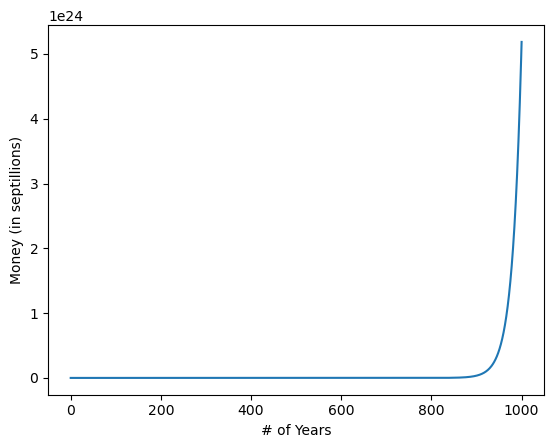

In [39]:
p = 1000
r = 0.05
M = p*np.exp(r*years)

plt.plot(years,M)
plt.xlabel('# of Years')
plt.ylabel('Money (in septillions)')
plt.show()

In [40]:
p = 1000
r = 0.05

S = p*(1+r*years)

print(S)

[ 1000.  1050.  1100. ... 50900. 50950. 51000.]


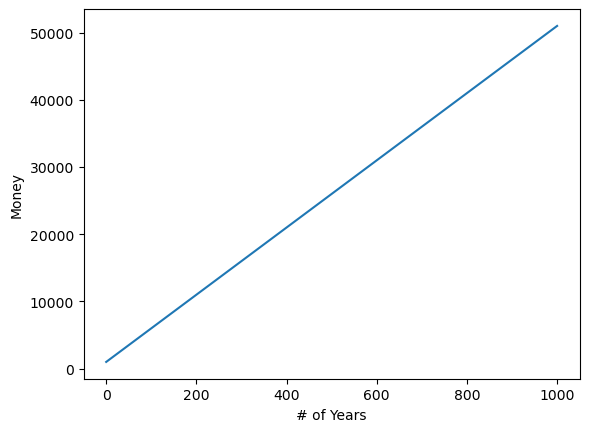

In [41]:
p = 1000
r = 0.05
S = p*(1+r*years)

plt.plot(years,S)
plt.xlabel('# of Years')
plt.ylabel('Money')
plt.show()

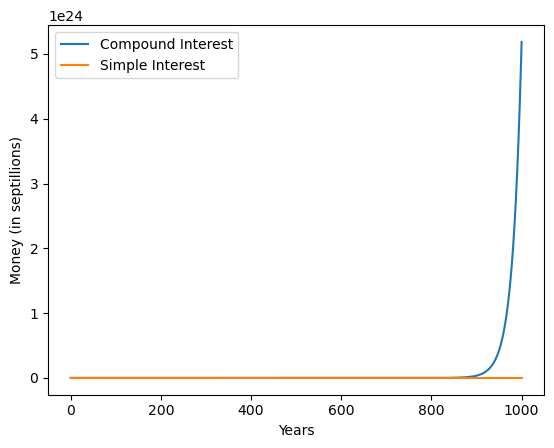

In [42]:
diff = M - S

plt.plot(years, M, label = 'Compound Interest')
plt.plot(years, S, label = 'Simple Interest')
plt.legend()
plt.xlabel('Years')
plt.ylabel('Money (in septillions)')
plt.show()